# Tarea 3. Midiendo rendimiento y riesgo.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.maxpixel.net/static/photo/1x/Wall-Street-Dices-Over-Newspaper-Profit-Loss-Risk-2656028.jpg" width="600px" height="400px" />

**Resumen.**
> En esta tarea descargarás datos históricos de precios y, con base en ellos, calcularás rendimientos. Luego se te pedirá resumir la distribución de rendimientos para cada instrumento calculando el rendimiento medio y volatilidad. De igual manera, se te pedirá presentar dicho resumen en una base anual.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea3_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea3_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (20 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2011 hasta el 31 de diciembre del 2015.

1. Mostrar el DataFrame de los precios diarios (10 puntos).
2. Graficar los precios (10 puntos).

In [1]:
# Importar paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web

In [4]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=start, end_date=end):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [5]:
names = ['^GSPC','MSFT','WBA','TSLA']
start = '2011-01-01'
end = '2015-12-31'

In [6]:
# Precios diarios
closes = get_adj_closes(tickers=names,
                       start_date=start)
closes.head()

Symbols          MSFT       TSLA        WBA        ^GSPC
Date                                                    
2011-01-03  22.558224  26.620001  32.173080  1271.869995
2011-01-04  22.646908  26.670000  32.443100  1270.199951
2011-01-05  22.574345  26.830000  32.893124  1276.560059
2011-01-06  23.235449  27.879999  32.991314  1273.849976
2011-01-07  23.058081  28.240000  32.794937  1271.500000

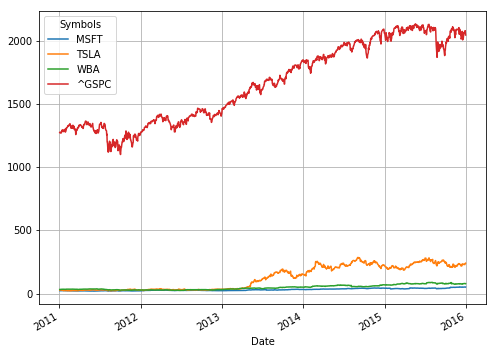

In [7]:
closes.plot(figsize=(8,6),grid=True)

## 2. Cálculo de rendimientos diarios (20 puntos)

A partir de los precios que descargaste en el anterior punto, calcular los rendimientos porcentuales diarios.

1. Mostrar el DataFrame de los rendimientos porcentuales diarios (10 puntos).
2. Graficar los rendimientos (10 puntos).

In [8]:
closes.shift()

Symbols          MSFT        TSLA        WBA        ^GSPC
Date                                                     
2011-01-03        NaN         NaN        NaN          NaN
2011-01-04  22.558224   26.620001  32.173080  1271.869995
2011-01-05  22.646908   26.670000  32.443100  1270.199951
2011-01-06  22.574345   26.830000  32.893124  1276.560059
2011-01-07  23.235449   27.879999  32.991314  1273.849976
2011-01-10  23.058081   28.240000  32.794937  1271.500000
2011-01-11  22.751709   28.450001  33.506809  1269.750000
2011-01-12  22.663031   26.959999  33.408623  1274.479980
2011-01-13  23.017773   26.959999  33.711369  1285.959961
2011-01-14  22.727526   26.219999  34.071384  1283.760010
2011-01-18  22.816206   25.750000  33.907745  1293.239990
2011-01-19  23.106449   25.639999  34.341415  1295.020020
2011-01-20  22.953266   24.030001  33.776825  1281.920044
2011-01-21  22.856524   22.620001  34.046837  1280.260010
2011-01-24  22.590466   23.040001  34.112309  1283.349976
2011-01-25  22.880707   24.490000  33.948654  1290.839966
2011-01-26  22.937140   24.680000  33.744099  1291.180054
2011-01-27  23.203199   24.750000  33.785007  1296.630005
2011-01-28  23.275759   24.920000  33.605003  1299.540039
2011-01-31  22.372786   24.010000  33.024040  1276.339966
2011-02-01  22.356667   24.100000  33.089497  1286.119995
2011-02-02  22.566280   23.910000  34.554142  1307.589966
2011-02-03  22.525969   23.940001  34.341415  1304.030029
2011-02-04  22.292166   23.629999  34.619602  1307.099976
2011-02-07  22.388910   23.459999  34.668701  1310.869995
2011-02-08  22.735588   23.070000  34.619602  1319.050049
2011-02-09  22.800087   24.490000  35.004177  1324.569946
2011-02-10  22.550152   23.209999  34.905991  1320.880005
2011-02-11  22.171234   23.219999  34.840538  1321.869995
2011-02-14  21.969673   23.250000  34.840538  1329.150024
...               ...         ...        ...          ...
2015-11-18  49.015099  214.000000  76.179863  2050.439941
2015-11-19  49.829388  221.070007  77.658066  2083.580078
2015-11-20  49.912678  221.800003  76.051285  2081.239990
2015-11-23  50.144005  220.009995  75.133148  2089.169922
2015-11-24  50.144005  217.750000  75.206596  2086.590088
2015-11-25  50.199520  218.250000  76.143127  2089.139893
2015-11-27  49.681332  229.639999  76.574661  2088.870117
2015-11-30  49.903416  231.610001  77.290825  2090.110107
2015-12-01  50.292049  230.259995  77.153084  2080.409912
2015-12-02  51.097107  237.190002  77.116386  2102.629883
2015-12-03  51.087849  231.990005  76.492004  2079.510010
2015-12-04  50.153259  232.710007  75.234146  2049.620117
2015-12-07  51.735580  230.380005  77.694832  2091.689941
2015-12-08  51.643044  231.130005  77.924355  2077.070068
2015-12-09  51.624538  226.720001  76.813377  2063.590088
2015-12-10  50.875023  224.520004  76.519562  2047.619995
2015-12-11  51.143368  227.070007  76.593018  2052.229980
2015-12-14  50.023716  217.020004  75.022972  2012.369995
2015-12-15  51.023075  218.580002  75.803391  2021.939941
2015-12-16  51.078594  221.089996  75.390228  2043.410034
2015-12-17  51.939148  234.509995  77.777458  2073.070068
2015-12-18  51.541260  233.389999  76.519562  2041.890015
2015-12-21  50.088486  230.460007  75.757484  2005.550049
2015-12-22  50.736225  232.559998  77.942711  2021.150024
2015-12-23  51.217388  229.949997  78.971054  2038.969971
2015-12-24  51.652302  229.699997  79.007774  2064.290039
2015-12-28  51.513504  230.570007  79.384232  2060.989990
2015-12-29  51.772598  228.949997  78.814980  2056.500000
2015-12-30  52.327797  237.190002  79.714760  2078.360107
2015-12-31  52.105721  238.089996  79.319969  2063.360107

[1258 rows x 4 columns]

In [9]:
ret1 = closes.pct_change().dropna()
ret1.head()

Symbols         MSFT      TSLA       WBA     ^GSPC
Date                                              
2011-01-04  0.003931  0.001878  0.008393 -0.001313
2011-01-05 -0.003204  0.005999  0.013871  0.005007
2011-01-06  0.029286  0.039135  0.002985 -0.002123
2011-01-07 -0.007634  0.012913 -0.005952 -0.001845
2011-01-10 -0.013287  0.007436  0.021707 -0.001376

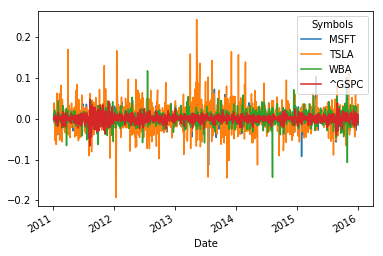

In [10]:
ret1.plot()

## 3. Resumen de distribución de rendimientos (30 puntos)

Con base en los rendimientos que calculaste en el punto anterior:

1. Calcular el rendimiento medio diario para el índice S&P 500 y para los demás activos. Anualizar los rendimientos (15 puntos). 

2. Calcular la volatilidad diaria para el índice S&P 500 y para los demás activos. Anualizar (15 puntos).

Por favor, reportar los resultados en DataFrames tal y como lo vimos en clase.

In [11]:
 ret1.mean()

Symbols
MSFT     0.000764
TSLA     0.002296
WBA      0.000839
^GSPC    0.000425
dtype: float64

In [12]:
ret1.std()

Symbols
MSFT     0.014799
TSLA     0.033246
WBA      0.016246
^GSPC    0.009738
dtype: float64

In [15]:
anual_ret_sumary = pd.DataFrame(data={'Mean':252*ret1.mean(),
                               'Volatility':np.sqrt(252)*ret1.std()},
                         index=ret1.columns)
anual_ret_sumary

Mean  Volatility
Symbols                      
MSFT     0.192464    0.234922
TSLA     0.578548    0.527757
WBA      0.211496    0.257905
^GSPC    0.107092    0.154583

## 4. Gráfico rendimientos esperados vs. volatilidad (30 puntos)

Graficar los rendimientos medios anuales contra las desviaciones estándar del índice S&P 500 y de los demás activos. Como vimos en clase, la volatilidad debe ir en el eje $x$ y el rendimiento esperado en el eje $y$. Se deben etiquetar los ejes y dar detalles para un completo entendimiento de la gráfica.

1. Gráfico (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. A partir del gráfico y de la línea recta ajustada, concluya acerca de la relación rendimiento/riesgo (10 puntos).

*Nota:* el ajuste de la línea recta corresponde a una regresión lineal. Si no saben como hacerlo, por favor preguntar en asesoría.

In [16]:
import scipy.optimize as opt

In [17]:
def obj_fun(beta, Er, sigma):
    return ((Er - (beta[0]+beta[1]*sigma))**2).sum()
beta_0 = [0,1]

In [23]:
solution = opt.minimize(obj_fun, beta_0,args=(y_points,x_points))
solution

      fun: 0.00045127050462227824
 hess_inv: array([[ 0.67217311, -1.8624509 ],
       [-1.8624509 ,  6.33935276]])
      jac: array([5.82076609e-11, 2.40106601e-10])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.10579668,  1.28729366])

In [24]:
beta =solution.x
y_points = y_points[np.argsort(x_points)]
x_points = np.sort(x_points)

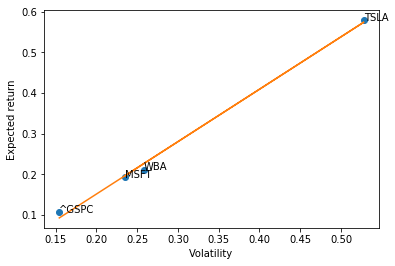

In [26]:
'^GSPC','MSFT','WBA','TSLA'
x_points = anual_ret_sumary['Volatility']
y_points = anual_ret_sumary['Mean']
# Ventana para graficar
plt.figure()
# Graficar puntos
plt.plot(x_points,y_points,'o')
# Etiquetas de los ejes
plt.xlabel('Volatility')
plt.ylabel('Expected return')
# Etiqueta de cada instrumento
plt.text(anual_ret_sumary.loc['^GSPC','Volatility'],
        anual_ret_sumary.loc['^GSPC','Mean'],
        '^GSPC')
plt.text(anual_ret_sumary.loc['MSFT','Volatility'],
        anual_ret_sumary.loc['MSFT','Mean'],
        'MSFT')
plt.text(anual_ret_sumary.loc['WBA','Volatility'],
        anual_ret_sumary.loc['WBA','Mean'],
        'WBA')
plt.text(anual_ret_sumary.loc['TSLA','Volatility'],
        anual_ret_sumary.loc['TSLA','Mean'],
        'TSLA')

plt.plot(x_points,beta[0]+beta[1]*x_points)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>